# Genshin Artifact Scouter

## Imports and Logging
The following lines of code imports the necessary tools to run and log GAS. The code will output results to both the on screen console as well as to an "output.log" file in the current directory. If you do not want to output to file, add a # on the `logging.FileHandler(...)` line below. Additionaly, the first time this code is run, it will download additional data [Dimbreath's GenshinData GitHub Repository](https://github.com/Dimbreath/GenshinData) for calculating character skills.

In [10]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [11]:
import logging

logging.basicConfig(
    level=logging.INFO,
    format="%(message)s",
    handlers=[
        logging.FileHandler(filename="output.log", mode="w", encoding="utf8"),
        logging.StreamHandler(),
    ],
)

import src as GAS

## Import Data from Genshin Optimizer
This code was designed to function as an offshoot of the great [Genshin Optimizer Tool by Frzyc](https://frzyc.github.io/genshin-optimizer/). GAS automatically imports characters, weapons, and artifacts straight from GO data.

To import from GO, you must first download your data from GO from [their downlods page](https://frzyc.github.io/genshin-optimizer/#/setting) on the browser use used to upload it. This will appear in a .json format. Then, copy that data somewhere it is accessable by this notebook. If you are using Jupyter in a web browser, this can be done by going to **File > Open (opens a new tab) > Upload**. Then, change the path provided below to point to your uploaded data.

I have provided a sample database at `./data/sample_go_data.json` which will serve as the default data location to serve as a demonstration of GAS functionality.

In [12]:
genshin_optimizer_data = GAS.GenshinOptimizerData("./data/sample_go_data.json")

--------------------------------------------------------------------------------------------------------------------------------------------
READING GENSHIN OPTIMIZER DATA FROM ./data/sample_go_data.json...
Characters imported successfully.
Artifacts imported successfully.



## Run Analysis


--------------------------------------------------------------------------------------------------------------------------------------------
EVALUATING ARTIFACT POTENTIALS

CHARACTER: Eula, 80/90
WEAPON: Serpent Spine, 90/90
EQUIPPED ARTIFACTS:
 NAME    SLOT STARS         SET LEVEL               MAIN STAT   HP  ATK  DEF  HP% ATK% DEF%   EM  ER%  CR%  CD%
# 423  Flower 5*           Pale 20/20                HP: 4780        19   21                     22.0      13.2
# 420   Plume 5*           Pale 20/20               ATK:  311  269                18.1           11.7  3.1     
# 421   Sands 5*           Pale 20/20              ATK%: 46.6                 9.3                 4.5  6.6 18.7
# 275  Goblet 5*          Witch 20/20     Physical DMG%: 58.3  508           11.1 14.6                      7.8
# 402 Circlet 5*           Pale 20/20              ATK%: 46.6        47       9.3                13.0      13.2

EULA CURRENT STATS:
CURRENT POWER:   9,500
   Base ATK   ATK  ATK%  Total ATK  Cri

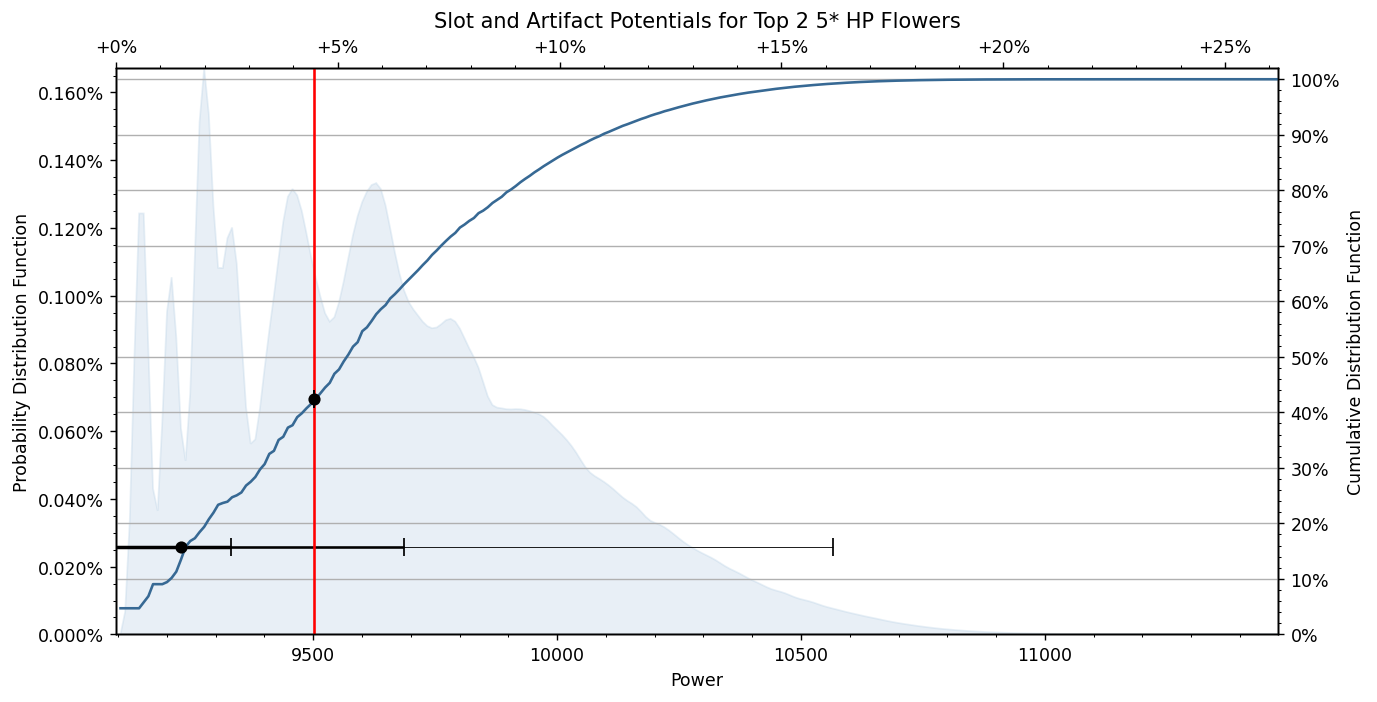

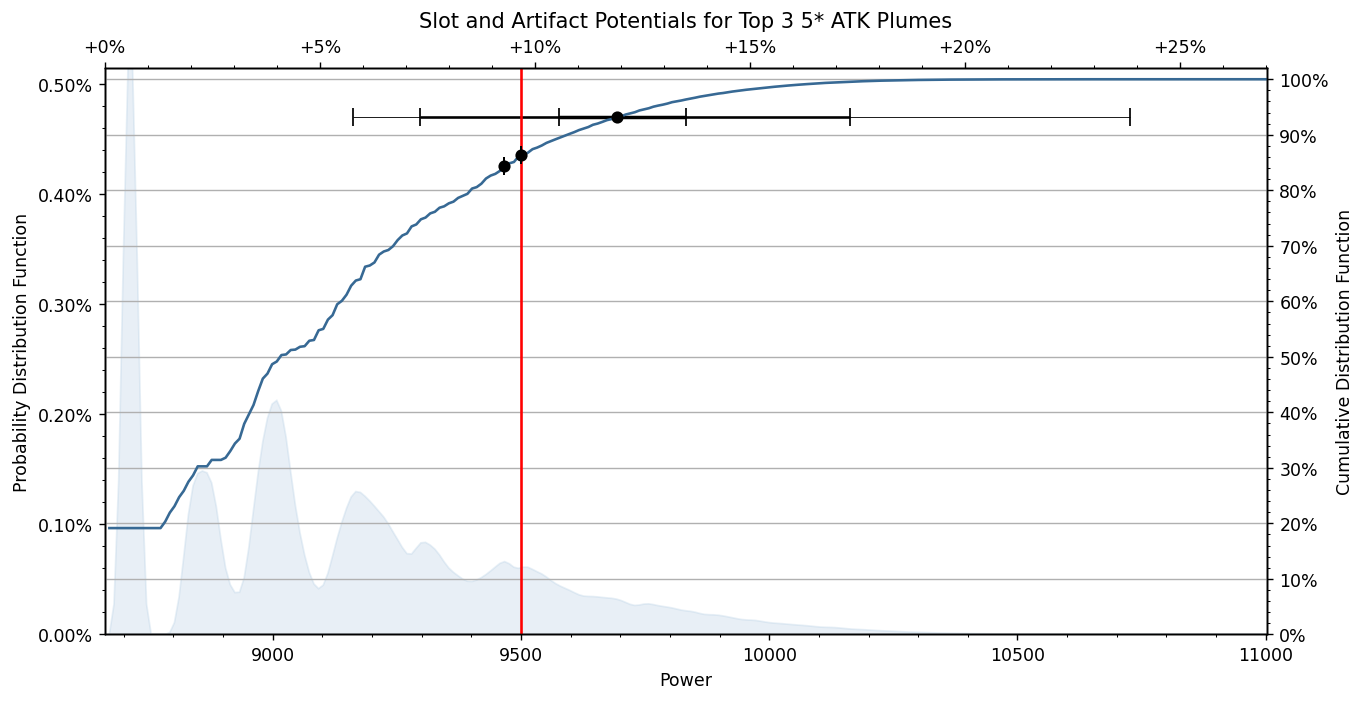

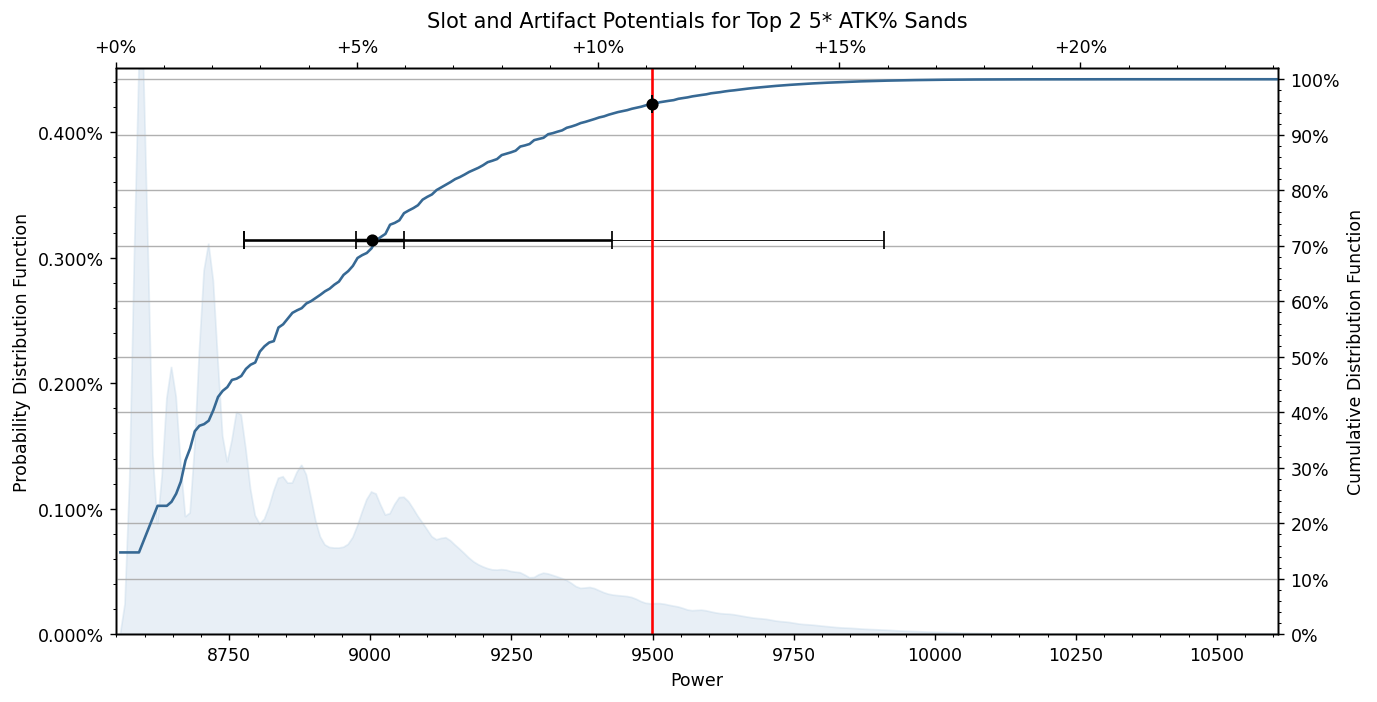

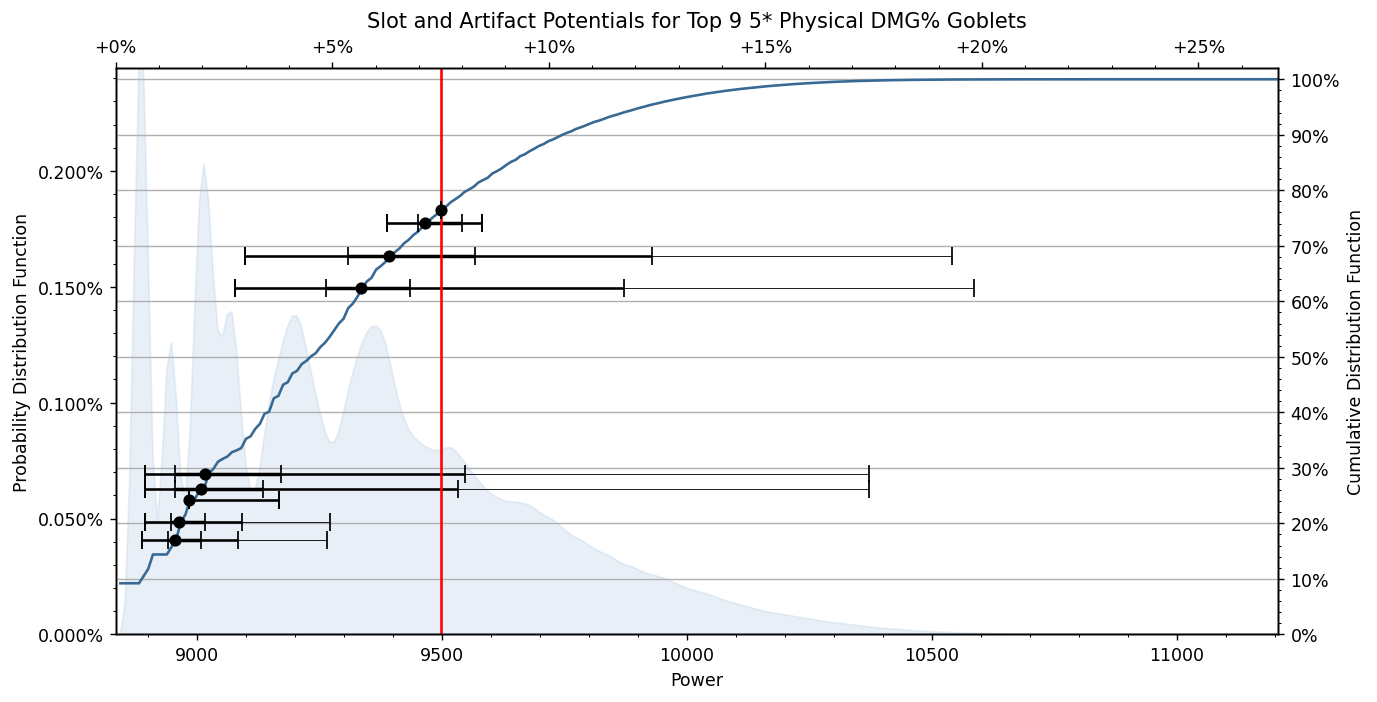

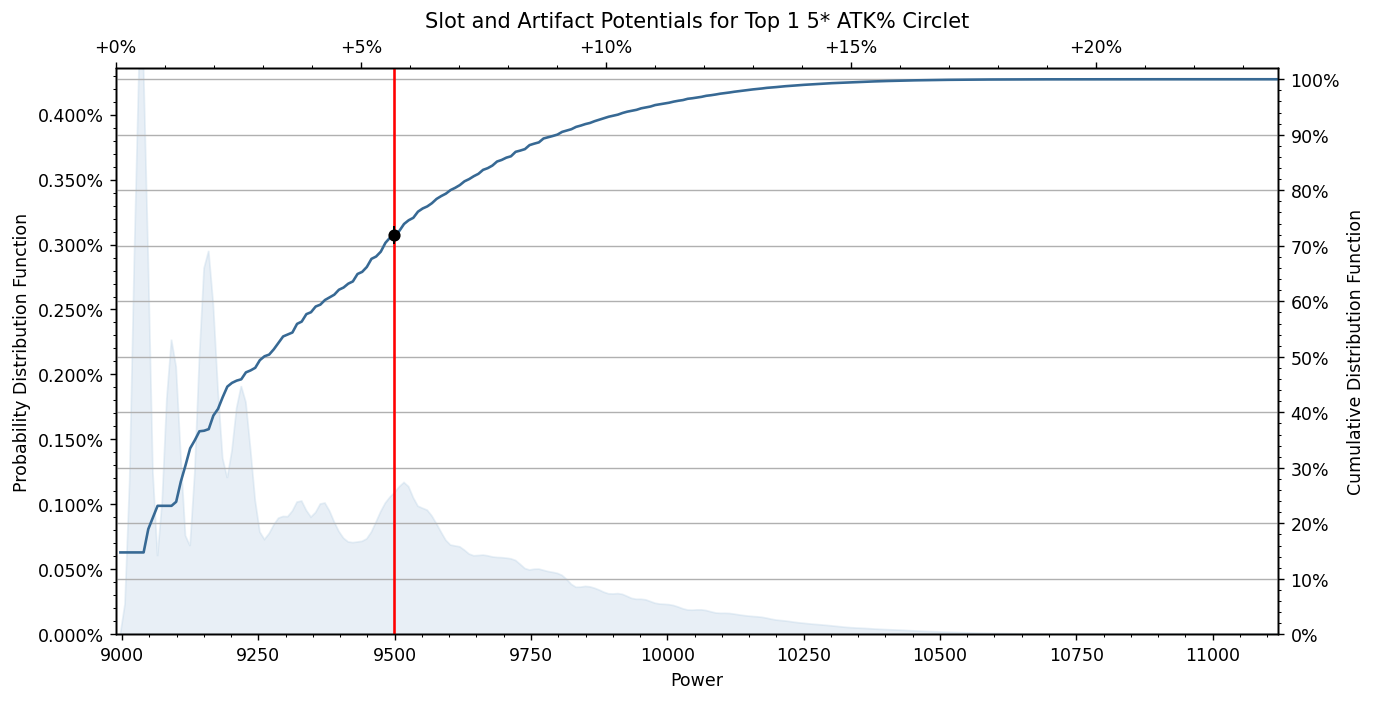

In [13]:
GAS.evaluate_character(
    genshin_optimizer_data=genshin_optimizer_data,
    character_name="Eula",
    character_dmg_type="Physical",
    character_scaling_stat="ATK",
    character_passive={},
    character_stat_transfer={},
    weapon_passive={"DMG%": 50.0},  # Serpent Spine R5
    amplifying_reaction=None,
    reaction_percentage=0.0,
    plot=True,
)